In [1]:
import matplotlib.pyplot as plt
import soundfile
import numpy as np
from IPython.display import Audio


In [ ]:
# IMPORTSOUNDFILE
# This script demonstrates converting a time in units of samples
# to time in units of seconds. First, it is accomplished
# sample-by-sample inside a loop. Second, it is accomplished all
# at once using array multiplication

# Import Sound File
filename = 'sw20.wav'
[x, Fs] = soundfile.read(filename)
Ts = 1/Fs
N = len(x)

# Method 1 - inside a loop
for n in range(N):
    # convert sample number 'n' to units of seconds 't'
    t = n * Ts # sec = sample * (sec/sample)
    # Note: Python indexing starts at n = 0
    # Time in seconds starts at t = 0

# Method 2 - array multiplication
# In this case, an array of sample numbers is created
# np.arange(0,N). Then it is multiplied by the sampling period
# to create a time vector with units of seconds
t = np.arange(0, N) * Ts # sec = sample * (sec/sample)

print(t)

[0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 9.99937500e-01
 9.99958333e-01 9.99979167e-01]


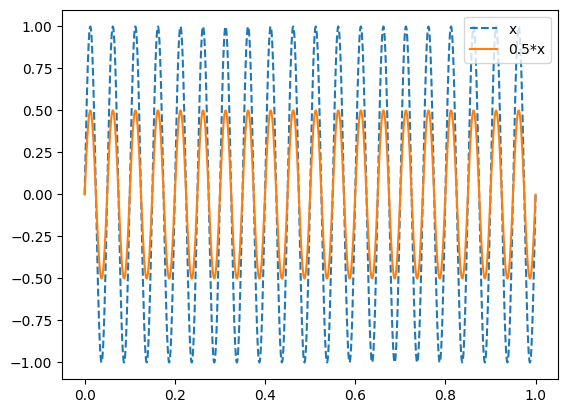

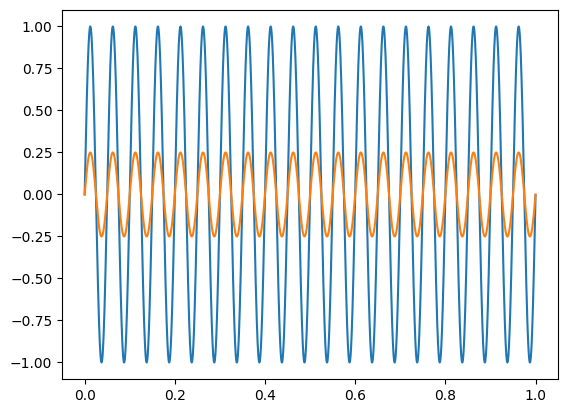

In [3]:
# SCALEAMP
# This script demonstrates two methods for scaling the amplitude
# of a signal. The first method uses a loop to perform element-wise
# indexing of the input signal. The second method uses element-wise
# multiplication of an array.

# Import input signal
filename = 'sw20.wav'
[x, Fs] = soundfile.read(filename) # input signal

Ts = 1/Fs
N = len(x)
# Time vector for plotting
t = np.arange(0, N) * Ts

# Example 1 - loop
g1 = 0.5 # Gain Scalar
y1 = np.zeros(N)

# n - variable for sample number
for n in range(N):
    # Multiply each element of 'x' by 'g1'
    y1[n] = g1 * x[n]
plt.figure(1)
plt.plot(t, x, '--', t, y1)
plt.legend(['x', '0.5*x'])

# Example 2 - array operation
g2 = 0.25

# In this approach, it is not necessary to use a loop to index
# the individual elements of 'x'. By default, this operation
# performs element-wise processing.
y2 = g2 * x

plt.figure(2)
plt.plot(t, x, t, y2)
plt.show()

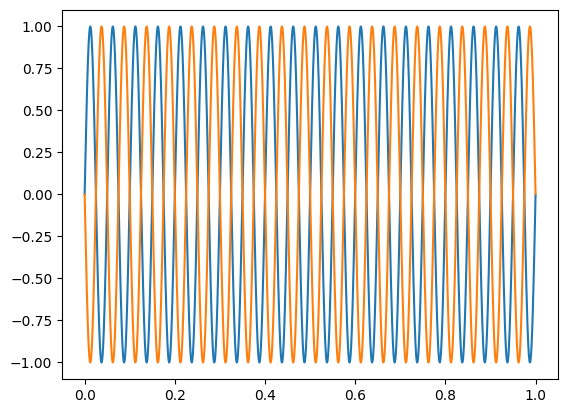

In [4]:
# POLARITYINVERSION
# This script demonstrates the process of inverting the polarity
# of a signal. It is performed by multiplying the signal by -1.

# 20 Hz signal for visualization
filename = 'sw20.wav'
[x, Fs] = soundfile.read(filename)
Ts = 1/Fs # Sampling period
N = len(x) # Total number of samples in signal
t = np.arange(0, N) * Ts
# Polarity inversion
y = -1 * x
plt.plot(t,x,t,y) # Plot the original signal and the processed
# signal. The processed signal should be a 'mirror image'
# version of the original reflected across the horizontal axis.

In [5]:
# DBAMPCHANGE This function changes the amplitude of a signal.
# This function changes the amplitude of a input signal based on
# a desired change relative to a decibel scale.

def db_amp_change(x, db_change):
    scale = pow(10, db_change/20) # Convert from decibel to linear
    return scale * x # Apply linear amplitude to signal

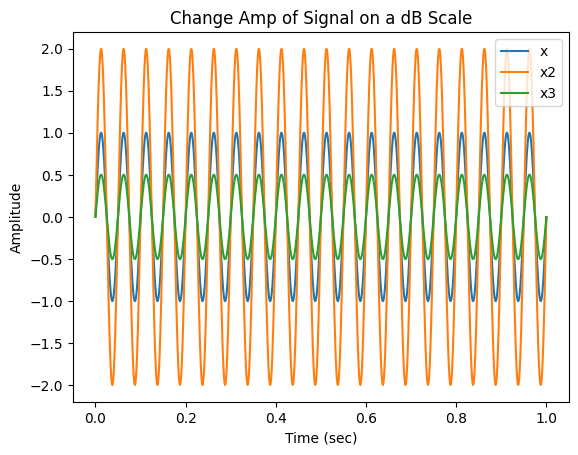

In [6]:
# DBAMPEXAMPLE
# This script provides an example for changing the amplitude
# of a signal on a decibel (dB) scale.
#
# See also DBAMPCHANGE

# Example - Sine wave test signal
[x, Fs] = soundfile.read('sw20.wav')
x2 = db_amp_change(x, 6)
x3 = db_amp_change(x, -6)

# Plot the result
plt.plot(t, x, t, x2, t, x3)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Change Amp of Signal on a dB Scale')
plt.legend(['x', 'x2', 'x3'])
plt.show()

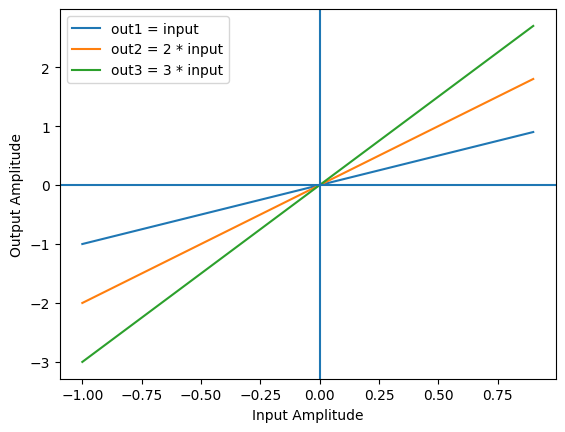

In [7]:
# CHARACTERISTICCURVE
# This script provides two examples for analyzing the
# characteristic curve of an audio effect which uses
# element-wise processing.
#
# This first example creates an input array with values
# from -1 to 1. The second example uses a sine wave signal.

# Example 1: Array [-1 to 1] to span entire full-scale range
input = np.arange(-1, 1, 0.1)

# Example 2: Sine wave test signal. This example shows the
# characteristic curve can be created using any signal which
# spans the full-scale range, even if it is periodic.
# Uncomment this code to switch examples.
# input, Fs = soundfile.read('sw20.wav')

# Assign input to out1, for comparison purposes
out1 = input # no amplitude change

N = len(input)
out2 = np.zeros(N)
# Loop through arrays to perform element-wise multiplication
for n in range(N):
    out2[n] = 2 * input[n]

# Element-wise multiplication can also be accomplished by
# multiplying an array directly by a scalar
out3 = 3 * input

# Plot the characteristic curve (Input vs. Output)
plt.plot(input, out1, input, out2, input, out3)
plt.xlabel('Input Amplitude')
plt.ylabel('Output Amplitude')
plt.legend(['out1 = input', 'out2 = 2 * input', 'out3 = 3 * input'])
# Draw axes through origin
plt.axhline(0)
plt.axvline(0)
plt.show()

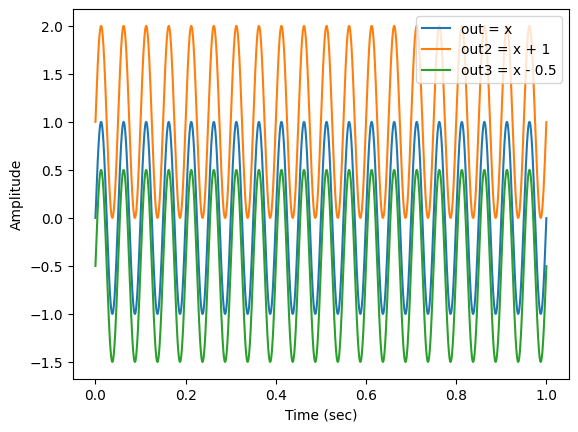

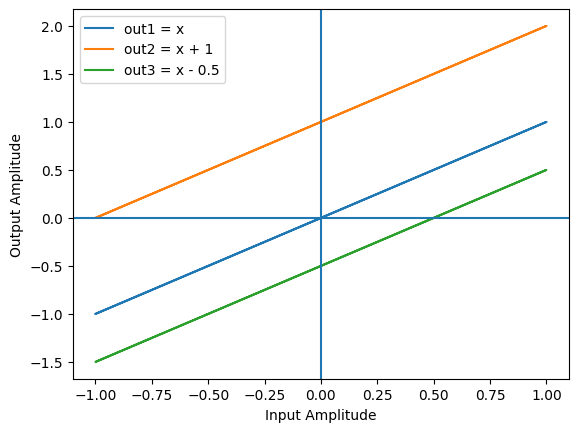

In [8]:
# DCOFFSET
# This script demonstrates a method to perform element-wise
# scalar addition, the equivalent of a DC offset
#
# NOT WORKING

# Example - Sine wave signal
[x, Fs] = soundfile.read('sw20.wav') # import sound file
Ts = 1/Fs
# Assign input to out1, for comparison purposes
out1 = x

N = len(x)
out2 = np.zeros(N) # Initialize output array

# Loop through arrays to perform element-wise scalar addition
for n in range(N):
    out2[n] = x[n] + 1

# Element-wise addition can also be accomplished by adding a
# scalar directly to an array.
out3 = x - 0.5

plt.figure(1) # Create new figure window
# Plot the output amplitude vs. time
t = np.arange(0, N) * Ts
plt.plot(t, out1, t, out2, t, out3)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend(['out = x', 'out2 = x + 1', 'out3 = x - 0.5'])

plt.figure(2)
# Plot the input vs. output
plt.plot(x, out1, x, out2, x, out3)
plt.xlabel('Input Amplitude')
plt.ylabel('Output Amplitude')
plt.legend(['out1 = x', 'out2 = x + 1', 'out3 = x - 0.5'])
# Draw axes through origin
plt.axhline(0)
plt.axvline(0)
plt.show()

In [9]:
# RMSAMP
# This script demonstrates the process of calculating the RMS
# amplitude of a signal. First, the samples in the signal are squared.
# Second, the mean (arithmetic average of the squared signal
# is found. Third, the square root of the mean of the squared
# signal is determined.

# Sine wave signal for testing
[x, Fs] = soundfile.read('sw20.wav') # have to use [x, Fs] rather than just x, problems arise
N = len(x) # total number of samples

# Square the individual samples of the signal
sigSquared = np.square(x) # Element-wise power operation; result is an array
# Find the mean. Note: result is now scalar
sigMeanSquared = (1/N) * np.sum(sigSquared)

# Take the square root
sigRootMeanSquared = np.sqrt(sigMeanSquared)
print(sigRootMeanSquared)
# RMS amplitude for a sine wave -> 0.707


0.7071061942642735
